Dataset Head:
   ID         App                                   Comments\n  score  Label
0   0  Amazon pay  Network buffering n payment gateways delays      5      1
1   1        Gpay              Sometimes delay in transaction       5      1
2   2      Paytm                                           nan      1     -1
3   3     PhonePe     Occasional issues with scanning QR Codes      1     -1
4   4         NaN                                          nan      5      1

Missing Values:
ID            0
App           3
Comments\n    0
score         0
Label         0
dtype: int64


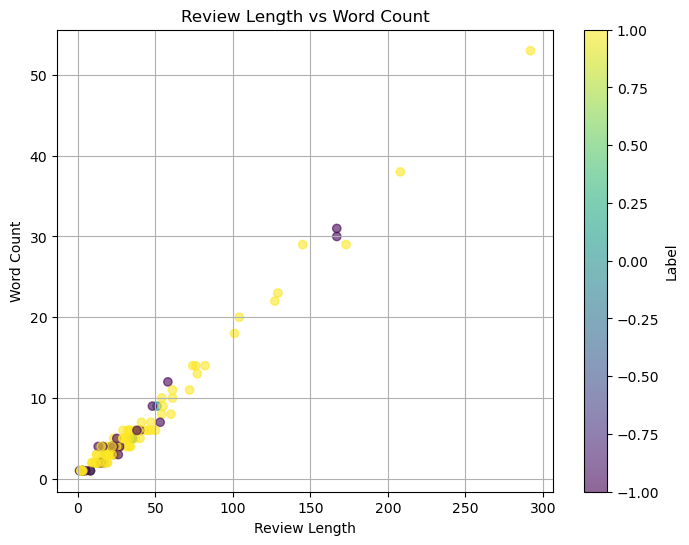

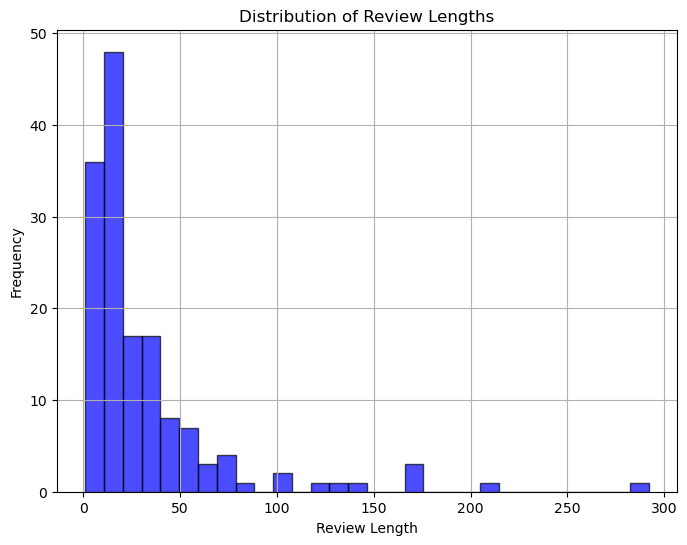

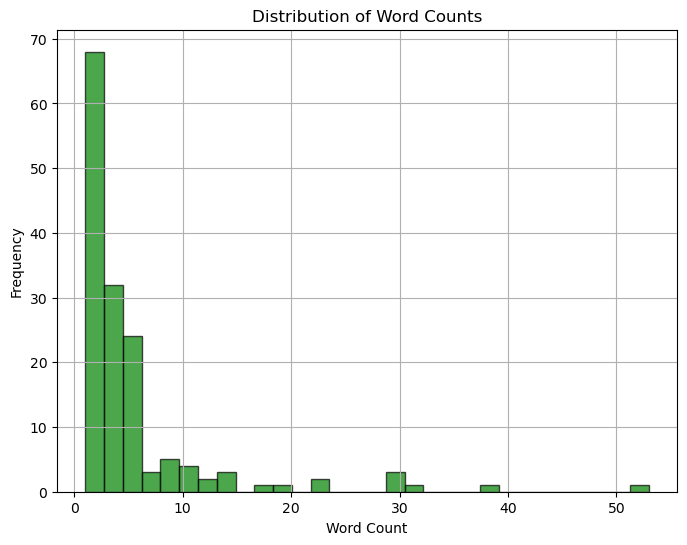


Top 20 Bigrams:
                     count
server issues           11
bank server              7
network issues           6
server issue             5
network issue            5
server busy              2
server errors            2
issue bank               2
technical issues         2
issues payment           2
transaction limit        2
bank servers             2
server problem           2
bank balance             2
connectivity issues      2
don use                  2
use upi                  2
major problem            2
server error             2
processing state         1


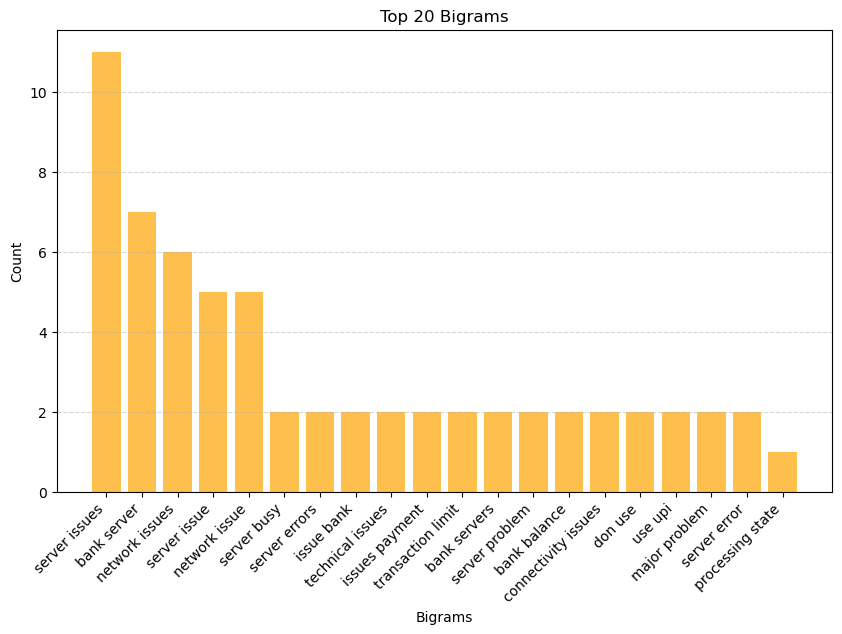


Top 20 Trigrams:
                               count
bank server issues                 6
server issues payment              2
account holds bank                 1
practically impossible better      1
payment doesn balance              1
payment don twice                  1
payment gateways delays            1
payments cross checking            1
payments data usage                1
payments larger funds              1
payments right sending             1
people adapted use                 1
people end losing                  1
poor connectivity problems         1
problem bank money                 1
payment delayed fails              1
problem connectivity customer      1
problem faced network              1
problem failure transactions       1
problem upi make                   1


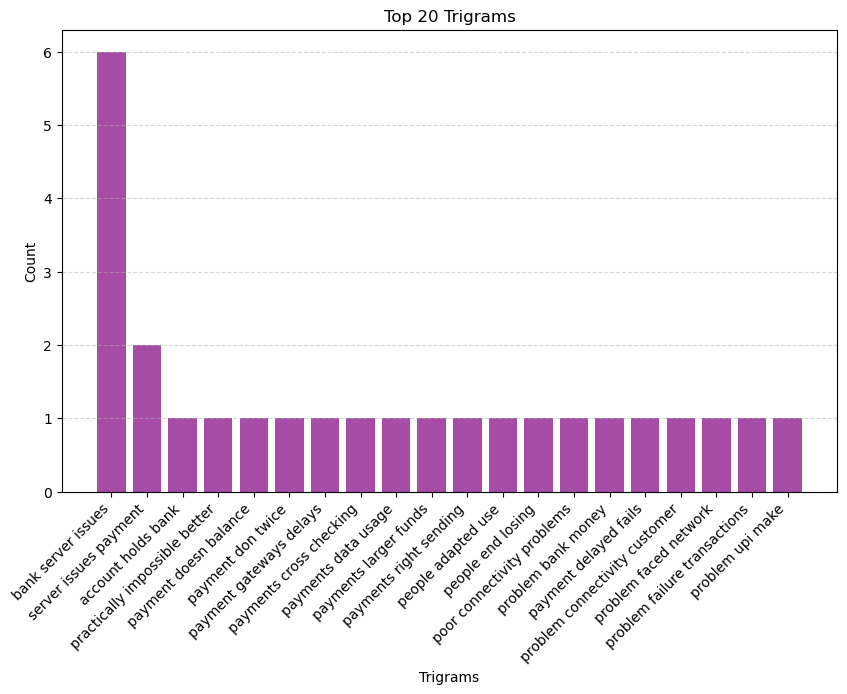

In [4]:
# Adjust the data to work with the new structure
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Use data from the new file's Sheet1
excel_file = 'Forms_data.xlsx'
df = pd.read_excel(excel_file)

# Ensure all values in the 'Comments' column are treated as strings
df['Comments\n'] = df['Comments\n'].astype(str).fillna('')

# Basic EDA
print("Dataset Head:")
print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())

# Add review length and word count
df['review_length'] = df['Comments\n'].apply(len)
df['word_count'] = df['Comments\n'].apply(lambda x: len(x.split()))

# Static scatter plot for review length vs word count
plt.figure(figsize=(8, 6))
plt.scatter(df['review_length'], df['word_count'], c=df['Label'], cmap='viridis', alpha=0.6)
plt.title('Review Length vs Word Count')
plt.xlabel('Review Length')
plt.ylabel('Word Count')
plt.grid(True)
plt.colorbar(label='Label')
plt.show()

# Static histogram for review lengths
plt.figure(figsize=(8, 6))
plt.hist(df['review_length'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Static histogram for word counts
plt.figure(figsize=(8, 6))
plt.hist(df['word_count'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# N-gram analysis function
def get_ngrams(comments, n=2, top_n=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(comments)
    ngram_counts = ngrams.sum(axis=0)
    ngram_features = vectorizer.get_feature_names_out()
    
    # Create a DataFrame of n-grams and their counts
    ngram_df = pd.DataFrame(ngram_counts.A1, index=ngram_features, columns=['count'])
    return ngram_df.sort_values(by='count', ascending=False).head(top_n)

# Generate and display bigrams
reviews = df['Comments\n'].dropna()
bigrams = get_ngrams(reviews, n=2, top_n=20)  # Get top 20 bigrams

print("\nTop 20 Bigrams:")
print(bigrams)

# Static bar plot for bigrams
plt.figure(figsize=(10, 6))
plt.bar(bigrams.index, bigrams['count'], color='orange', alpha=0.7)
plt.title('Top 20 Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Generate and display trigrams
trigrams = get_ngrams(reviews, n=3, top_n=20)  # Get top 20 trigrams

print("\nTop 20 Trigrams:")
print(trigrams)

# Static bar plot for trigrams
plt.figure(figsize=(10, 6))
plt.bar(trigrams.index, trigrams['count'], color='purple', alpha=0.7)
plt.title('Top 20 Trigrams')
plt.xlabel('Trigrams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


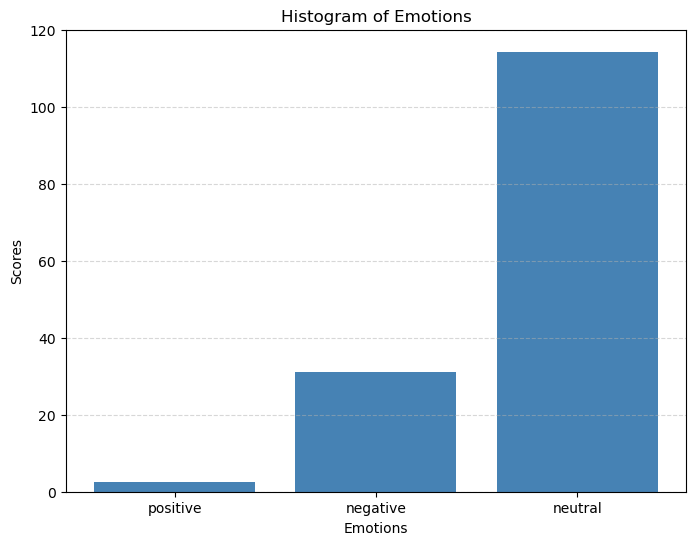

In [6]:
# Adjusting the sentiment analysis code to match the new data structure
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the dataset from Sheet1 of the newly uploaded Excel file
excel_file = 'Forms_data.xlsx'
df = pd.read_excel(excel_file)

# Ensure all values in the 'Comments' column are treated as strings
df['Comments\n'] = df['Comments\n'].astype(str).fillna('')

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Step 2: Perform sentiment analysis on the 'Comments' column
df['sentiment_scores'] = df['Comments\n'].apply(lambda x: sid.polarity_scores(x))

# Extract individual sentiment scores
df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['neutral'] = df['sentiment_scores'].apply(lambda x: x['neu'])

# Step 3: Sum sentiment scores for each emotion
emotion_totals = {
    'positive': df['positive'].sum(),
    'negative': df['negative'].sum(),
    'neutral': df['neutral'].sum()
}

# Convert to data frame for plotting
emotion_df = pd.DataFrame(list(emotion_totals.items()), columns=['emotion', 'score'])

# Step 4: Create a histogram using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(emotion_df['emotion'], emotion_df['score'], color='steelblue')
plt.title("Histogram of Emotions")
plt.xlabel("Emotions")
plt.ylabel("Scores")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Optional: Export the sentiment scores to a CSV file
df[['Comments\n', 'positive', 'negative', 'neutral']].to_csv('sentiment_scores.csv', index=False)
